<a href="https://colab.research.google.com/github/osalex800/Analisis-y-visualizacion-de-datos/blob/main/Practica_EstDescInf_OACM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Tarea 1.1: Instala y carga las librerías necesarias
# Instalación de librerías (solo la primera vez)
install.packages("modeest")    # Para calcular la moda
install.packages("moments")    # Para asimetría y curtosis
install.packages("ggplot2")    # Visualización avanzada
install.packages("corrplot")   # Matrices de correlación

# Carga de librerías
library(modeest)
library(moments)
library(ggplot2)
library(corrplot)

# Fijar semilla para reproducibilidad
set.seed(42)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
# --- Tarea 1.2: Carga las bases de datos
# --- Base de datos 1: Calidad de Vino Tinto ---
wine_quality <- read.csv("WineQT.csv")

# --- Base de datos 2: Tipos de Vino (UCI Wine Dataset) ---
# Este archivo NO tiene encabezados, debemos asignar nombres
col_names <- c("Tipo", "Alcohol", "Acido_Malico", "Ceniza",
               "Alcalinidad_Ceniza", "Magnesio", "Fenoles_Totales",
               "Flavonoides", "Fenoles_No_Flav", "Proantocianinas",
               "Intensidad_Color", "Tono", "OD280_OD315", "Prolina")

wine_tipos <- read.csv("wine.data", header = FALSE, col.names = col_names)

# Convertir 'Tipo' a factor (variable categórica)
wine_tipos$Tipo <- as.factor(wine_tipos$Tipo)

# Verificar la carga
cat("Wine Quality: ", dim(wine_quality), "\n")
cat("Wine Tipos:   ", dim(wine_tipos), "\n")


Wine Quality:  1143 13 
Wine Tipos:    178 14 


In [46]:
# Tarea 2.1: Exploración de la estructura de los datos
# Estructura del dataset
str(wine_quality)

# Primeras 10 observaciones
head(wine_quality, 10)

# Resumen estadístico general
summary(wine_quality)

# Nombres de las variables
names(wine_quality)

'data.frame':	1143 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Id                  : int  0 1 2 3 4 5 6 7 8 10 ...


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,6
8,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7,7
9,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7,8


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3925   1st Qu.:0.0900   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2500   Median : 2.200  
 Mean   : 8.311   Mean   :0.5313   Mean   :0.2684   Mean   : 2.532  
 3rd Qu.: 9.100   3rd Qu.:0.6400   3rd Qu.:0.4200   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 21.00       1st Qu.:0.9956  
 Median :0.07900   Median :13.00       Median : 37.00       Median :0.9967  
 Mean   :0.08693   Mean   :15.62       Mean   : 45.91       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 61.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :68.00       Max.   :289.00  

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Id"

In [47]:
# Existen valores faltantes (NA)
sum(is.na(wine_quality))

[1] 0

# Tarea 2.1: Exploración de la estructura de los datos

a) ¿Cuántas variables numéricas tiene el dataset?

R: Tiene 13 variables y todas son numéricas (11 tipo num y 2 tipo int).

b) ¿Qué tipo de datos tiene cada columna?

R: Tiene 2 tipos de las cuales hay 11 columnas son numéricas (num) y 2 son enteras (int): quality e Id

c) ¿Existen valores faltantes (NA)?

R: No. sum(is.na(wine_quality)) = 0 (cero valores faltantes)

In [48]:
# Tarea 2.2: Exploración de la base wine_tipos
str(wine_tipos)
head(wine_tipos, 10)
summary(wine_tipos)

# Frecuencia de cada tipo de vino
table(wine_tipos$Tipo)

'data.frame':	178 obs. of  14 variables:
 $ Tipo              : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol           : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Acido_Malico      : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ceniza            : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinidad_Ceniza: num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesio          : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Fenoles_Totales   : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavonoides       : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Fenoles_No_Flav   : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proantocianinas   : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Intensidad_Color  : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Tono              : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280_OD315       : num  3.92 

,Tipo,Alcohol,Acido_Malico,Ceniza,Alcalinidad_Ceniza,Magnesio,Fenoles_Totales,Flavonoides,Fenoles_No_Flav,Proantocianinas,Intensidad_Color,Tono,OD280_OD315,Prolina
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
7,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
8,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
9,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


 Tipo      Alcohol       Acido_Malico       Ceniza      Alcalinidad_Ceniza
 1:59   Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60     
 2:71   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20     
 3:48   Median :13.05   Median :1.865   Median :2.360   Median :19.50     
        Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49     
        3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50     
        Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00     
    Magnesio      Fenoles_Totales  Flavonoides    Fenoles_No_Flav 
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300  
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700  
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400  
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619  
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375  
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600  
 Proan


 1  2  3 
59 71 48 

# Tarea 2.2: Exploración de la base wine_tipos

Preguntas a responder:
a) ¿Cuántas observaciones hay de cada tipo de vino (1, 2 y 3)?

R: Las observaciones de cadaa tipo son: Tipo 1: 59, Tipo 2: 71 y Tipo 3: 48

b) ¿La base de datos está balanceada (similar número de observaciones por tipo)?

R: No, no lo esta ya que el tipo 2 tiene más registros y el tipo 3 menos (71 vs 48)

In [49]:
# Tarea 2.3: Calcula la media, mediana y moda de las variables alcohol y pH del dataset wine_quality
# Media
mean(wine_quality$alcohol)
mean(wine_quality$pH)

# Mediana
median(wine_quality$alcohol)
median(wine_quality$pH)

# Moda (requiere librería modeest)
mfv(wine_quality$alcohol)    # mfv = most frequent value
mfv(wine_quality$pH)

# Presenta un resumen organizado
cat("=== ALCOHOL ===", "\n")
cat("Media:   ", mean(wine_quality$alcohol), "\n")
cat("Mediana: ", median(wine_quality$alcohol), "\n")
cat("Moda:    ", mfv(wine_quality$alcohol), "\n\n")

cat("=== pH ===", "\n")
cat("Media:   ", mean(wine_quality$pH), "\n")
cat("Mediana: ", median(wine_quality$pH), "\n")
cat("Moda:    ", mfv(wine_quality$pH), "\n")

[1] 10.44211

[1] 3.311015

[1] 10.2

[1] 3.31

[1] 9.5

[1] 3.3

=== ALCOHOL === 
Media:    10.44211 
Mediana:  10.2 
Moda:     9.5 

=== pH === 
Media:    3.311015 
Mediana:  3.31 
Moda:     3.3 


# Tarea 2.3: Calcula la media, mediana y moda de las variables alcohol y pH del dataset wine_quality

Pregunta: Comparando media y mediana del alcohol, ¿la distribución parece simétrica o sesgada?

R: La distribución parece que esta sesgada a la derecha teniendo un patron de sesgo positivo.

La media que es (10.44) lo cual es mayor a la mediana de (10.2). esto se genera cuando hay algunos valores altos de alcohol que hacen que el promedio este hacia arriba, mientras que la medianan esta cerca del centro real de los datos.

Siendo sesgada a la derecha por que la media > mediana > moda (10.44 > 10.2 > 9.5) hacen que la media se jale hacia arriba.

In [52]:
# Tarea 2.4: Calcula las medidas de tendencia central para Alcohol y Prolina de wine_tipos, agrupando por Tipo de vino
# Media de Alcohol por Tipo de vino
tapply(wine_tipos$Alcohol, wine_tipos$Tipo, mean)

# Mediana de Alcohol por Tipo
tapply(wine_tipos$Alcohol, wine_tipos$Tipo, median)

# Media de Prolina por Tipo
tapply(wine_tipos$Prolina, wine_tipos$Tipo, mean)

# Mediana de Prolina por Tipo
tapply(wine_tipos$Prolina, wine_tipos$Tipo, median)

1        2        3 
13.74475 12.27873 13.15375

1      2      3 
13.750 12.290 13.165

1         2         3 
1115.7119  519.5070  629.8958

1      2      3 
1095.0  495.0  627.5

# Tarea 2.4: Calcula las medidas de tendencia central para Alcohol y Prolina de wine_tipos, agrupando por Tipo de vino

Pregunta: ¿Qué tipo de vino tiene mayor contenido promedio de alcohol? ¿Y de prolina?

R: Para identificar que tipo de vino tiene mayor contenido promedio de alcohol se utilizo la las mediciones de (Promedio/media por tipo) quedanso asi:

Alcohol: Tipo 1: 13.74475|Tipo 2: 12.27873|Tipo 3: 13.15375 > Mayor contenido promedio de alcohol: Tipo 1 (13.74475)

Prolina: Tipo 1: 1115.7119|Tipo 2: 519.5070|Tipo 3: 629.8958 > Mayor contenido promedio de Prolina: Tipo 1 (1115.7119)

In [53]:
# Tarea 2.5: Calcula varianza, desviación estándar, rango y coeficiente de variación para la variable alcohol de wine_quality
alcohol <- wine_quality$alcohol

# Varianza
varianza <- var(alcohol)
cat("Varianza:            ", varianza, "\n")

# Desviación estándar
desv_est <- sd(alcohol)
cat("Desviación estándar: ", desv_est, "\n")

# Rango
rango <- range(alcohol)
cat("Mínimo:", rango[1], " | Máximo:", rango[2], "\n")
cat("Rango (amplitud):    ", diff(rango), "\n")

# Coeficiente de Variación (CV)
cv <- (desv_est / mean(alcohol)) * 100
cat("Coef. de Variación:  ", round(cv, 2), "%\n")

Varianza:             1.171147 
Desviación estándar:  1.082196 
Mínimo: 8.4  | Máximo: 14.9 
Rango (amplitud):     6.5 
Coef. de Variación:   10.36 %


# Tarea 2.5: Calcula varianza, desviación estándar, rango y coeficiente de variación para la variable alcohol de wine_quality

Pregunta: Según el coeficiente de variación, ¿la variable alcohol presenta poca, moderada o mucha dispersión?

R: tenemos los datos del resultado del alcohol-wine_quality con:

Varianza: 1.171147
Desviación estándar: 1.082196
Mínimo-Máximo: 8.4-14.9 > Rango: 6.5
Coeficiente de variación (CV): 10.36%

Entonces con esto la variable alcohol va a presentar poca o baja dispersión, ya que el CV = 10.36% y esto indica que esta por debajo del 15% que es el criterio de baja dispersión.

In [55]:
# Tarea 2.6: Compara la dispersión de Flavonoides entre los 3 tipos de vino usando wine_tipos
# Desviación estándar por tipo de vino
tapply(wine_tipos$Flavonoides, wine_tipos$Tipo, sd)

# Coeficiente de variación por tipo
cv_por_tipo <- function(x) {
  (sd(x) / mean(x)) * 100
}
tapply(wine_tipos$Flavonoides, wine_tipos$Tipo, cv_por_tipo)

1         2         3 
0.3974936 0.7057008 0.2935041

1        2        3 
13.32810 33.91414 37.55850

# Tarea 2.6: Compara la dispersión de Flavonoides entre los 3 tipos de vino usando wine_tipos

Pregunta: ¿Cuál tipo de vino presenta mayor variabilidad en sus Flavonoides? ¿Qué implicación práctica podría tener esto?

R: El tipo de vino por desviación estándar que tiene mayor variabilidad absoluta seria el: Tipo 2 y por coeficiente de variacíon (CV) que tiene la mayor variabilidad relativa seria el: Tipo 3

Los tipos con mayor variabilidad (Tipo 2 en SD y Tipo 3 en CV) tienen flavonoides que son menos constantes entre sus vinos generando un mayor reto de control de calidad/estandarización y puede complicar la clasificacion si se usa flavonoides como una variable para poder distinguir los tipos.

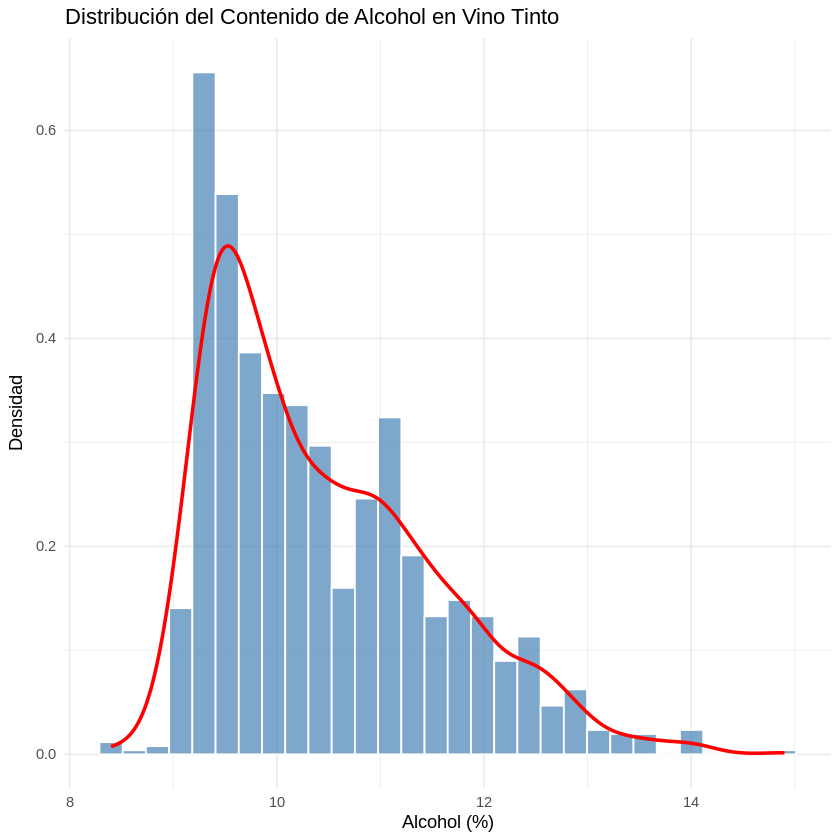

In [56]:
# Tarea 3.1: Histograma y densidad de la variable alcohol
# Histograma con curva de densidad usando ggplot2
ggplot(wine_quality, aes(x = alcohol)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins = 30, fill = "steelblue", color = "white", alpha = 0.7) +
  geom_density(color = "red", linewidth = 1) +
  labs(title = "Distribución del Contenido de Alcohol en Vino Tinto",
       x = "Alcohol (%)", y = "Densidad") +
  theme_minimal()

# Tarea 3.1: Histograma y densidad de la variable alcohol

Pregunta: Con base en el histograma y los valores de asimetría calculados, ¿la distribución es simétrica? ¿Hacia qué lado está sesgada?

R: No, no es simétrica.

Está sesgada a la derecha (asímetría positiva), ya que el historgrama/densidad nos muestra una cola que va hacia valores que son altos del alcohol y que ademas la media que es de 10.44 sera mayor que la mediana que es de 10.2, lo que nos da posibilidad de coincidir con un valor de asimetria > 0.